In [6]:
# 셀리니움 
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import time
import re
from tqdm.notebook import tqdm
from datetime import date, timedelta

def driver_close():
    driver.close()
    driver.switch_to.window(driver.window_handles[0])

In [7]:
# 2019-02-01 ~ 2020-02-01 '집콕 정주행 검색'
driver = webdriver.Chrome('c:/py_data/chromedriver.exe')
keyword = input('검색어 입력:')
main_url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='
sub_url = '&rangeType=PERIOD&orderBy=sim&startDate=2019-02-01&endDate=2020-02-01&keyword='

tit_lst = []
cont_lst = []
comm_lst = []
err_lst = []
dt_lst = []


for pagenum in tqdm(range(1,151)):
    driver.get(main_url + str(pagenum) + sub_url + keyword)
    time.sleep(1.0)
    html =driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    link_len = len(soup.find_all('strong', class_='title_post'))+1
    for golink in range(1,link_len):
        driver.find_element_by_css_selector('#content > section > div.area_list_search > div:nth-child('+str(golink)+') > div > div.info_post > div.desc > a.desc_inner').click()
        time.sleep(1.0)
        driver.switch_to.window(driver.window_handles[-1])
        driver.switch_to_frame('mainFrame')                             
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        try:
            title = soup.find('p', class_='se-text-paragraph se-text-paragraph-align-center').text
            cont = soup.find('div', class_='se-main-container').text
            
        except:
            err_lst.append(driver.current_url)
            driver_close()
            continue
            
        title = re.sub('[^ㄱ-ㅣ가-힣]',' ',title)
        tit_lst.append(title)
        cont = re.sub('[^ㄱ-ㅣ가-힣]',' ',cont)
        cont_lst.append(cont)
        driver_close()
    
        
jipkok_1_df = pd.DataFrame({'title':tit_lst,'content':cont_lst})
jipkok_1_df.to_csv('c:/py_data/jipkok1 코로나 이전.csv', encoding='cp949')

# 1050개 블로그 검색결과

검색어 입력:집콕 정주행


<ipython-input-7-784dd3533d85>:24: DeprecationWarning: use driver.switch_to.frame instead
  driver.switch_to_frame('mainFrame')


In [100]:
jipkok_1_df.to_csv('c:/py_data/jipkok1 코로나 이전.csv', encoding='cp949')

In [8]:
jipkok_1_df

,title,content
0,꿀 같은 황금연휴 어린이날 성북동데이트 포켓볼 닭발...,남치니는 안쉬는 슬픈 황금연휴 덕분에 대체휴일엔 집콕 ...
1,집콕일상 육아일상,요즘 가을 하늘 너 무 예쁜데 걸렸던 몸살이...
2,주말 변신 즐토데토 집콕 얌일,주말 변신 즐토데토 집콕 얌일 일...
3,도쿄 워홀 도미노 피자 인터넷 주문 라인 할인 쿠폰 쓰기 카케구루이...,...
4,일요일은 집콕 집에서도 부지런피 처묵처묵,다이어트 일차 자잘하게 세워둔 계획들이 있었는데귀찮고 피곤해서 뒹굴뒹굴...
...,...,...
115,주간 호주 일상 간장게장 닭발 에그타르트 쏘야 스테이...,일주일이 어떻게 가는지 모르겠네더 밀리기전에 일상털이아무래도 주째 인...
116,월 일상,안녕 꽤나 좋게 보냈던 월그리고 년의 마지막 달 년을 마...
117,슬금슬금 일상글,블로그 안하는거 아니고 요즘 가던 곳만 가서 ㅋㅋㅋㅋㅋ올릴 글 없구요 지...
118,년 월과 월이 어울러진 한주 일상,년 월달아 잘가 월달아 반가워 ...


In [102]:
text_all=''
for i in jipkok_1_df.index:
    text_all = text_all + " " +jipkok_1_df.iloc[i][0]+ " " + jipkok_1_df.iloc[i][1]

In [103]:
text_all

'               꿀 같은 황금연휴  어린이날  성북동데이트  포켓볼  닭발  팔백집 물갈비  집콕  마블정주행                남치니는 안쉬는 슬픈 황금연휴 덕분에 대체휴일엔 집콕         밀린 일상글을 와다다다 포스팅 하는 중 ㅋㅋㅋㅋ 사실 바빠서 체험단을 신청을 못하다보니 포스팅 할만한 게 없는 것도 일상글 쓰는 이유 중 하나 나는 잇님들 일상글이 맛집 포스팅보다 더 재밌는데 잇님들도 그럴까  아무튼 재밌게 봐주셨으면 좋겠오욤 히히           성북동카페  안암동평행선  성북동데이트하기좋은곳                요즘 일주일에 한 번씩 남치니네 동네가서 카페 뿌시기 중ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 아놔 성북구 카페로 책 한 권 내야되는 거 아니냐는  출판 투자하실 분 계신가욤              뻔뻔                      소품 하나하나  카페 내 모든 자리가 내 감성 자극                       요긴 증말 최근에 간 카페 중 체고로  예쁜카페  감성카페혼자 다 해                카페 평행선 서울특별시 성북구 안암동 가                   어린이날행사                 성북구청 앞  성북천 에 사람이 바글바글                 삐에로아즈찌가 풍선도 만들어주고                무료로 솜사탕도 나눠주고  만들기 체험도 하고  간이놀이터까지애두라 맘껏 즐기렴  어린이 시기는 길지 않단다              성북구청 서울특별시 성북구 삼선동 가                 성신여대락큐  성북동포켓볼                요즘 남치니랑 데이트할 때 필수코스인  포켓볼여기 여러 번 갔었는데 쿠폰을 이 날 처음 받았다   뭔가 억울 열 시간을 치면 한 시간 무룐데 아홉시간 더 쳐야되네                락큐 서울특별시 성북구 동선동 가                             성신여대역 근처에서 낮맥 때리려고 돌아다니다가 발

In [12]:
# !pip install Jpype1==1.2.0

In [104]:
from konlpy.tag import Okt
okt = Okt()

In [105]:
jipkok1 = okt.morphs(text_all, stem=True)   # 형태소 추출
jipkok1

['꿀',
 '같다',
 '황금',
 '연휴',
 '어린이날',
 '성북동',
 '데이트',
 '포켓볼',
 '닭발',
 '팔',
 '백',
 '집',
 '물',
 '갈비',
 '집콕',
 '마블',
 '정',
 '주행',
 '남다',
 '안',
 '쉬다',
 '슬프다',
 '황금',
 '연휴',
 '덕분',
 '에',
 '대체휴일',
 '엔',
 '집콕',
 '밀리다',
 '일상',
 '글',
 '을',
 '오다',
 '다다다',
 '포스팅',
 '하다',
 '중',
 'ㅋㅋㅋㅋ',
 '사실',
 '바쁘다',
 '체험',
 '단',
 '을',
 '신청',
 '을',
 '못',
 '하다',
 '보다',
 '포스팅',
 '하다',
 '한',
 '게',
 '없다',
 '것',
 '도',
 '일상',
 '글',
 '쓰다',
 '이유',
 '중',
 '하나',
 '나',
 '는',
 '잇님들',
 '일상',
 '글',
 '이',
 '맛집',
 '포스팅',
 '보다',
 '더',
 '재밌다',
 '잇님들',
 '도',
 '그렇다',
 '아무튼',
 '재밌다',
 '보다',
 '좋다',
 '욤',
 '히',
 '히',
 '성북동',
 '카페',
 '안암동',
 '평행선',
 '성북동',
 '데이트',
 '하다',
 '좋다',
 '곳',
 '요즘',
 '일주일',
 '에',
 '하다',
 '번',
 '씩',
 '남다',
 '동네',
 '가다',
 '카페',
 '뿌',
 '시기',
 '중',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '아',
 '놓다',
 '성북구',
 '카페',
 '로',
 '책',
 '하다',
 '권',
 '내야',
 '되다',
 '거',
 '아니다',
 '출판',
 '투자',
 '하다',
 '분',
 '계시다',
 '욤',
 '뻔뻔',
 '소품',
 '하나',
 '하나',
 '카페',
 '내',
 '모든',
 '자리',
 '가',
 '내',
 '감성',
 '자극',
 '요긴',
 '증말',
 '최근',
 '에',
 '간',
 '카페',
 '중',
 '체고',
 '로

In [39]:
# !pip install customized_konlpy

In [42]:
from ckonlpy.tag import Twitter

Twitter = Twitter()

Tpos = Twitter.pos(text_all)
Tpos

C:\Users\CPB06GameN\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('남치니는', 'Verb'),
 ('안', 'VerbPrefix'),
 ('쉬는', 'Verb'),
 ('슬픈', 'Adjective'),
 ('황금', 'Noun'),
 ('연휴', 'Noun'),
 ('덕분', 'Noun'),
 ('에', 'Josa'),
 ('대체휴일', 'Noun'),
 ('엔', 'Josa'),
 ('집콕', 'Noun'),
 ('밀린', 'Verb'),
 ('일상', 'Noun'),
 ('글', 'Noun'),
 ('을', 'Josa'),
 ('와', 'Verb'),
 ('다다다', 'Noun'),
 ('포스팅', 'Noun'),
 ('하는', 'Verb'),
 ('중', 'Noun'),
 ('ㅋㅋㅋㅋ', 'KoreanParticle'),
 ('사실', 'Noun'),
 ('바빠서', 'Adjective'),
 ('체험', 'Noun'),
 ('단', 'Noun'),
 ('을', 'Josa'),
 ('신청', 'Noun'),
 ('을', 'Josa'),
 ('못', 'VerbPrefix'),
 ('하다', 'Verb'),
 ('보니', 'Verb'),
 ('포스팅', 'Noun'),
 ('할만', 'Verb'),
 ('한', 'Determiner'),
 ('게', 'Noun'),
 ('없는', 'Adjective'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('일상', 'Noun'),
 ('글', 'Noun'),
 ('쓰는', 'Verb'),
 ('이유', 'Noun'),
 ('중', 'Noun'),
 ('하나', 'Noun'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('잇님들', 'Noun'),
 ('일상', 'Noun'),
 ('글', 'Noun'),
 ('이', 'Josa'),
 ('맛집', 'Noun'),
 ('포스팅', 'Noun'),
 ('보다', 'Josa'),
 ('더', 'Noun'),
 ('재밌는데', 'Adjective'),
 ('잇님들', 'Noun'),
 ('도', 

In [106]:
noun_lst = []
for tag in Tpos:
    if tag[1] in ['Noun']:
        noun_lst.append(tag[0])

noun_lst

['황금',
 '연휴',
 '덕분',
 '대체휴일',
 '집콕',
 '일상',
 '글',
 '다다다',
 '포스팅',
 '중',
 '사실',
 '체험',
 '단',
 '신청',
 '포스팅',
 '게',
 '것',
 '일상',
 '글',
 '이유',
 '중',
 '하나',
 '나',
 '잇님들',
 '일상',
 '글',
 '맛집',
 '포스팅',
 '더',
 '잇님들',
 '아무',
 '욤',
 '성북동',
 '카페',
 '안암동',
 '평행선',
 '성북동',
 '데이트',
 '곳',
 '요즘',
 '일주일',
 '번',
 '동네',
 '카페',
 '뿌',
 '시기',
 '중',
 '성북구',
 '카페',
 '책',
 '권',
 '내야',
 '거',
 '출판',
 '투자',
 '분',
 '계',
 '신가',
 '욤',
 '뻔뻔',
 '소품',
 '하나',
 '하나',
 '카페',
 '내',
 '모든',
 '자리',
 '내',
 '감성',
 '자극',
 '요긴',
 '증말',
 '최근',
 '간',
 '카페',
 '중',
 '체고',
 '카페',
 '감성',
 '카페',
 '혼자',
 '해',
 '카페',
 '평행선',
 '서울특별시',
 '성북구',
 '안암동',
 '어린이날',
 '행사',
 '성북구',
 '청',
 '앞',
 '성북천',
 '사람',
 '삐',
 '찌',
 '풍선',
 '무료',
 '솜사탕',
 '만들기',
 '체험',
 '간이',
 '놀이터',
 '애',
 '맘껏',
 '어린이',
 '시기',
 '성북구',
 '청',
 '서울특별시',
 '성북구',
 '삼선동',
 '성신여대',
 '락큐',
 '성북동',
 '포켓볼',
 '요즘',
 '데이트',
 '때',
 '필수',
 '코스',
 '포켓볼',
 '여기',
 '여러',
 '번',
 '쿠폰',
 '이',
 '날',
 '처음',
 '뭔가',
 '억울',
 '열',
 '시간',
 '치면',
 '시간',
 '무룐데',
 '아홉시',
 '간',
 '더',
 '락큐',
 '서울특별시',
 '성북구'

In [107]:
jipkok1_dic = []
for i in noun_lst:
    if len(i) != 1:
        jipkok1_dic.append(i)
noun_lst = jipkok1_dic

In [108]:
noun_lst

['황금',
 '연휴',
 '덕분',
 '대체휴일',
 '집콕',
 '일상',
 '다다다',
 '포스팅',
 '사실',
 '체험',
 '신청',
 '포스팅',
 '일상',
 '이유',
 '하나',
 '잇님들',
 '일상',
 '맛집',
 '포스팅',
 '잇님들',
 '아무',
 '성북동',
 '카페',
 '안암동',
 '평행선',
 '성북동',
 '데이트',
 '요즘',
 '일주일',
 '동네',
 '카페',
 '시기',
 '성북구',
 '카페',
 '내야',
 '출판',
 '투자',
 '신가',
 '뻔뻔',
 '소품',
 '하나',
 '하나',
 '카페',
 '모든',
 '자리',
 '감성',
 '자극',
 '요긴',
 '증말',
 '최근',
 '카페',
 '체고',
 '카페',
 '감성',
 '카페',
 '혼자',
 '카페',
 '평행선',
 '서울특별시',
 '성북구',
 '안암동',
 '어린이날',
 '행사',
 '성북구',
 '성북천',
 '사람',
 '풍선',
 '무료',
 '솜사탕',
 '만들기',
 '체험',
 '간이',
 '놀이터',
 '맘껏',
 '어린이',
 '시기',
 '성북구',
 '서울특별시',
 '성북구',
 '삼선동',
 '성신여대',
 '락큐',
 '성북동',
 '포켓볼',
 '요즘',
 '데이트',
 '필수',
 '코스',
 '포켓볼',
 '여기',
 '여러',
 '쿠폰',
 '처음',
 '뭔가',
 '억울',
 '시간',
 '치면',
 '시간',
 '무룐데',
 '아홉시',
 '락큐',
 '서울특별시',
 '성북구',
 '동선동',
 '성신여대역',
 '근처',
 '낮맥',
 '려고',
 '다가',
 '발견',
 '카페',
 '로스',
 '디아스',
 '입구',
 '부터',
 '스멜',
 '폴폴',
 '아보',
 '디저트',
 '맛집',
 '던데',
 '어서',
 '카페',
 '투어리스트',
 '성북동',
 '닭발',
 '닭발',
 '낮맥',
 '장소',
 '한참',
 '어린이날',
 '시간',
 '맥주',
 '이나',
 '래

In [114]:
stopword = ['어서','어요','다가','진짜','우리','시간','면서','까지','오늘','사람','요즘','보고','그냥',
           '하나','오랜만','이제','부터','아하','정말','여기','시작','이번','하루','다시','려고','때문','아주','계속','역시',
           '아아','마지막','더니','정도','처음','조금','머리','다른','열심','해주','지도','아무','어가','하니','완전',
           '지금','코드','지원','소요','제일','자리','광고','자고','한번','어도','자마자','처럼','달라','거의','별로','사고','이나','어보','어디',
           '다미','어제','라서','더보','는걸','구나','아보','이지','집콕','래서','가기','마다','만큼','타고','개월','인지','레드','중이','가득','모든','전체','무슨']

In [115]:
temp_dic = []
for i in noun_lst:
    if i not in stopword:
        temp_dic.append(i)
noun_lst = temp_dic

In [116]:
noun_lst

['황금',
 '연휴',
 '덕분',
 '대체휴일',
 '일상',
 '다다다',
 '포스팅',
 '사실',
 '체험',
 '신청',
 '포스팅',
 '일상',
 '이유',
 '잇님들',
 '일상',
 '맛집',
 '포스팅',
 '잇님들',
 '성북동',
 '카페',
 '안암동',
 '평행선',
 '성북동',
 '데이트',
 '일주일',
 '동네',
 '카페',
 '시기',
 '성북구',
 '카페',
 '내야',
 '출판',
 '투자',
 '신가',
 '뻔뻔',
 '소품',
 '카페',
 '감성',
 '자극',
 '요긴',
 '증말',
 '최근',
 '카페',
 '체고',
 '카페',
 '감성',
 '카페',
 '혼자',
 '카페',
 '평행선',
 '서울특별시',
 '성북구',
 '안암동',
 '어린이날',
 '행사',
 '성북구',
 '성북천',
 '풍선',
 '무료',
 '솜사탕',
 '만들기',
 '체험',
 '간이',
 '놀이터',
 '맘껏',
 '어린이',
 '시기',
 '성북구',
 '서울특별시',
 '성북구',
 '삼선동',
 '성신여대',
 '락큐',
 '성북동',
 '포켓볼',
 '데이트',
 '필수',
 '코스',
 '포켓볼',
 '여러',
 '쿠폰',
 '뭔가',
 '억울',
 '치면',
 '무룐데',
 '아홉시',
 '락큐',
 '서울특별시',
 '성북구',
 '동선동',
 '성신여대역',
 '근처',
 '낮맥',
 '발견',
 '카페',
 '로스',
 '디아스',
 '입구',
 '스멜',
 '폴폴',
 '디저트',
 '맛집',
 '던데',
 '카페',
 '투어리스트',
 '성북동',
 '낮맥',
 '장소',
 '한참',
 '어린이날',
 '맥주',
 '커플',
 '블로그',
 '위해',
 '주문',
 '위해',
 '메뉴판',
 '웃픔',
 '주의',
 '우린',
 '미니',
 '계란찜',
 '미니',
 '주먹밥',
 '주문',
 '칭따오',
 '오하',
 '발가락',
 '부분',
 '튤립',
 '먹기',
 '서울특별시',
 '성북구',


In [117]:
houseBefore = dict(Counter(noun_lst).most_common())
houseBefore

{'생각': 380,
 '엄마': 342,
 '카페': 302,
 '바로': 260,
 '드라마': 240,
 '저녁': 236,
 '영상': 224,
 '정주': 218,
 '아침': 216,
 '영화': 210,
 '오빠': 200,
 '일상': 194,
 '주말': 178,
 '언니': 178,
 '친구': 174,
 '선물': 174,
 '아빠': 172,
 '마음': 170,
 '사실': 168,
 '행복': 166,
 '커피': 164,
 '다음': 162,
 '점심': 162,
 '도움말': 162,
 '복사': 162,
 '이상': 156,
 '맥주': 154,
 '아직': 154,
 '노래': 150,
 '주문': 146,
 '사랑': 144,
 '맛집': 136,
 '추천': 134,
 '가지': 134,
 '느낌': 130,
 '기분': 126,
 '남편': 124,
 '아기': 122,
 '치킨': 118,
 '병원': 116,
 '화질': 114,
 '먹기': 112,
 '여행': 112,
 '포스팅': 110,
 '선택': 110,
 '다리': 110,
 '퇴근': 110,
 '기도': 108,
 '트랙': 108,
 '이야기': 108,
 '혼자': 106,
 '블로그': 106,
 '소스': 106,
 '부산': 106,
 '월요일': 104,
 '날씨': 102,
 '하늘': 100,
 '거리': 100,
 '위해': 98,
 '구경': 98,
 '지나': 98,
 '음식': 98,
 '출근': 98,
 '시즌': 98,
 '먹음': 96,
 '언제': 96,
 '갑자기': 96,
 '최고': 96,
 '마무리': 94,
 '준비': 94,
 '블랙': 94,
 '일요일': 90,
 '동안': 88,
 '원래': 88,
 '여름': 88,
 '인생': 86,
 '그녀': 86,
 '보기': 84,
 '데이': 84,
 '일찍': 84,
 '메뉴': 84,
 '보이': 84,
 '세상': 84,
 '고민': 84,
 '도착': 84

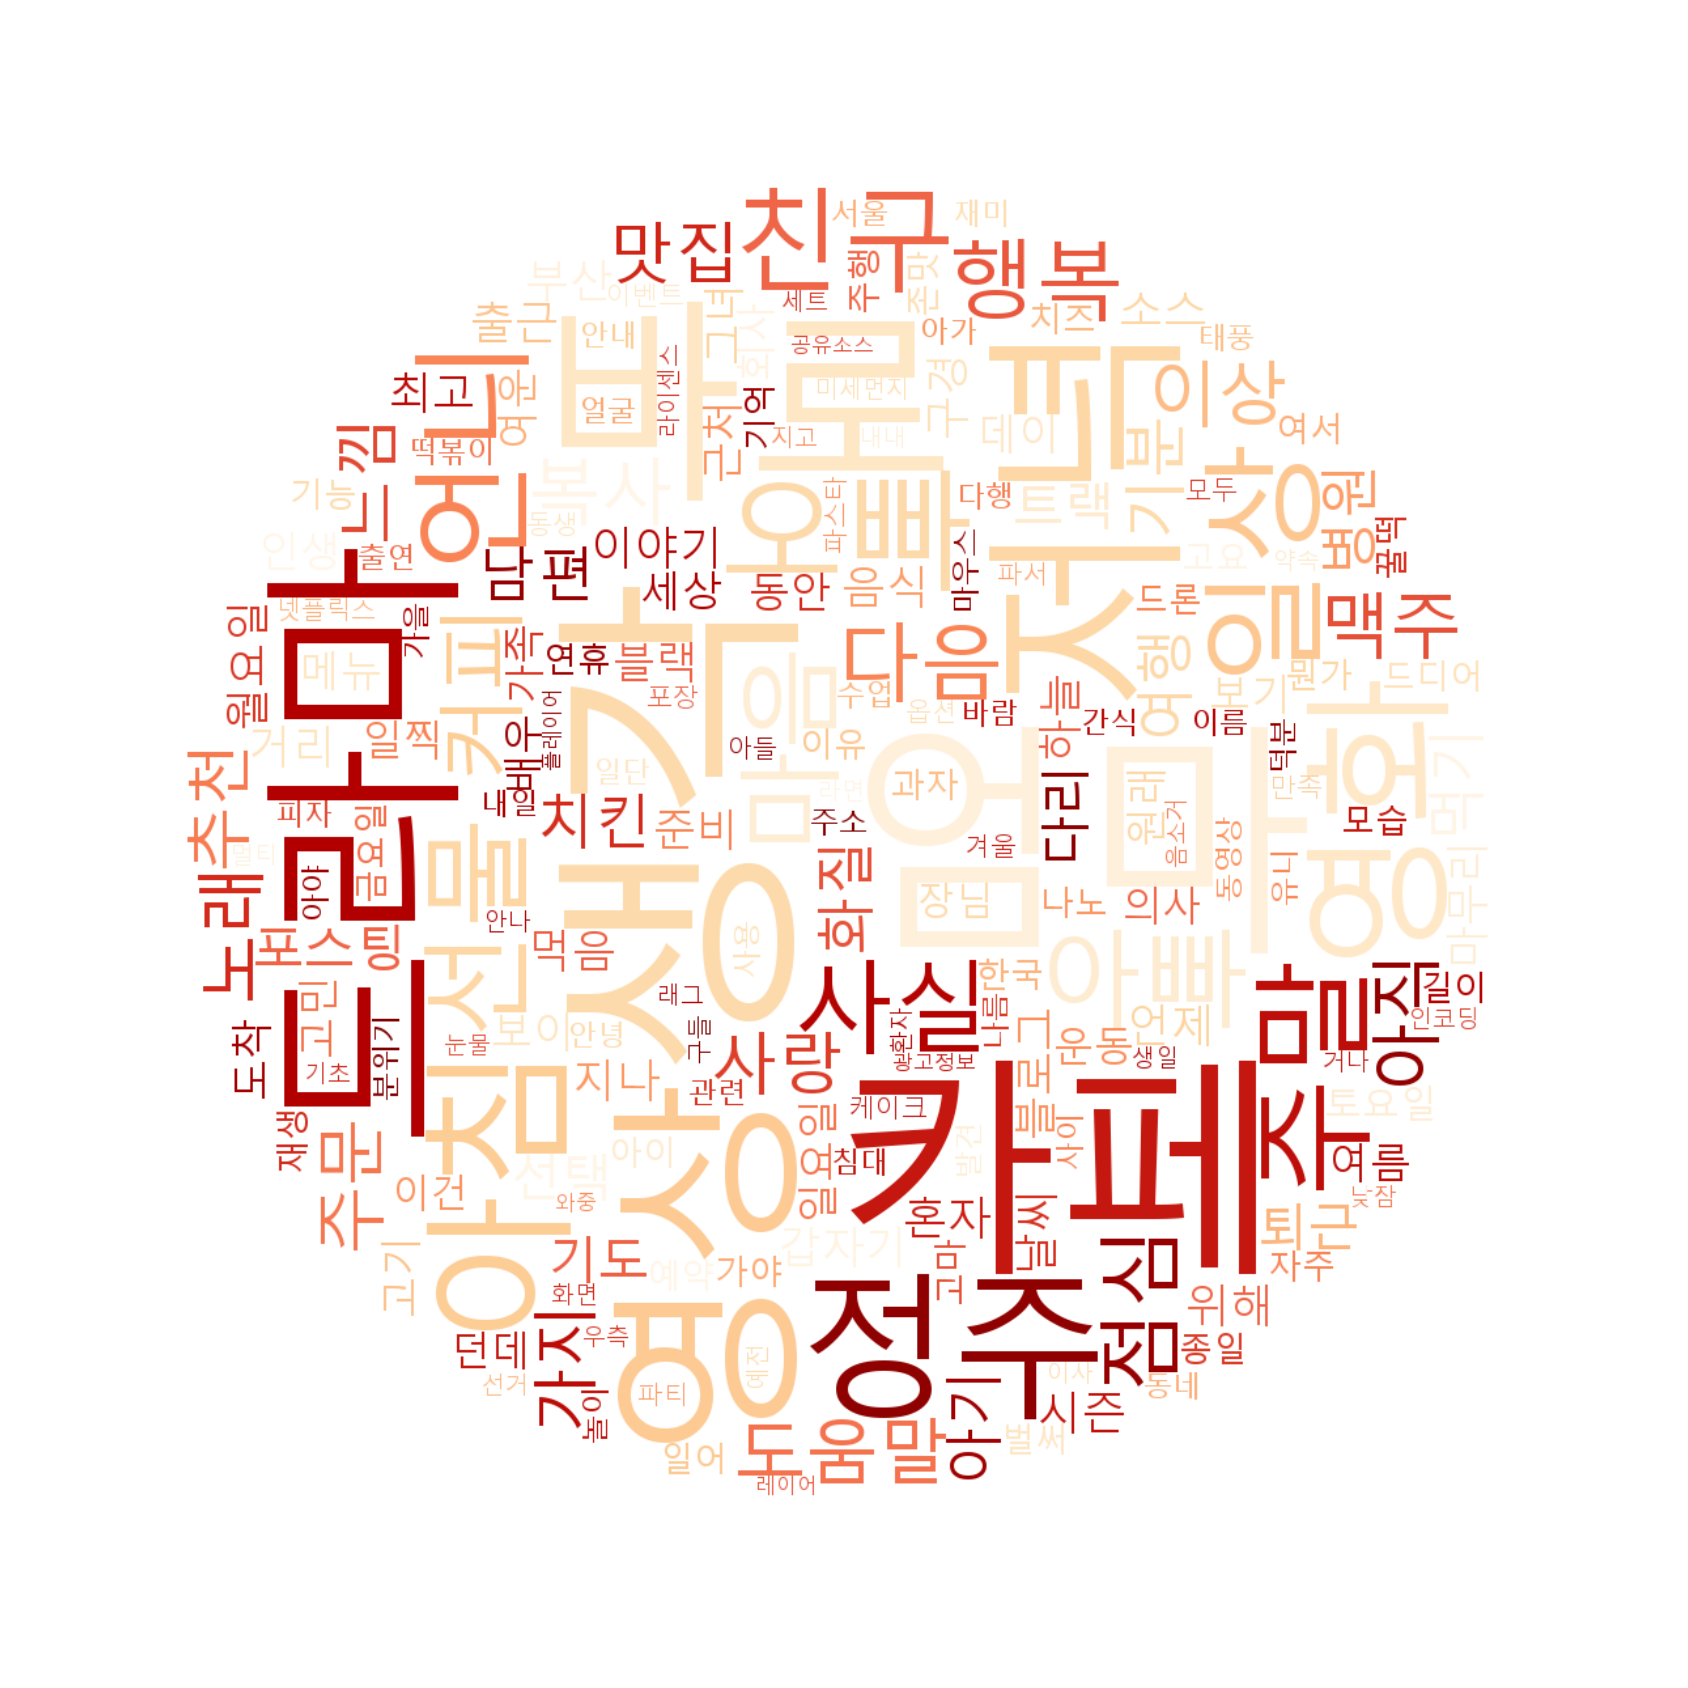

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
img_path = 'c:/py_data/TV.jpg'
cloud_mask = np.array(Image.open(img_path))


wordcloud = WordCloud(font_path="c:/Windows/Fonts/malgun.ttf", 
                      colormap='OrRd',
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(houseBefore)
plt.figure(figsize=(30,40))
plt.imshow(wc)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [119]:
KOKbefore_df = pd.DataFrame(list(houseBefore.items()),
                   columns=['단어', '횟수'])
KOKbefore_df.to_csv('c:/py_data/py_project/코로나 이전 집콕.csv', encoding='cp949')